In [4]:
import pandas as pd
from diccios import diccionario_individual, diccionario_hogar

PARTE 1

EJERCICIO 2 Y 3

In [5]:
# 2004
df_hogar_2004 = pd.read_stata("Hogar_T12004.dta")
df_individual_2004 = pd.read_stata("Individual_T12004.dta")

In [6]:
# 2024
df_hogar_2024 = pd.read_excel("usu_hogar_T12024.xlsx")
df_individual_2024 = pd.read_excel("usu_individual_T12024.xlsx")

In [7]:
# Calcular el porcentaje de valores nulos en cada columna
# # 2004
null_percentage_hogar_2004 = df_hogar_2004.isnull().mean() * 100
null_percentage_individual_2004 = df_individual_2004.isnull().mean() * 100
# # 2024
null_percentage_hogar_2024 = df_hogar_2024.isnull().mean() * 100
null_percentage_individual_2024 = df_individual_2024.isnull().mean() * 100


# Filtrar las columnas que tienen más del 20% de valores nulos
# # 2004
columns_with_high_nulls_hogar_2004 = null_percentage_hogar_2004[null_percentage_hogar_2004 > 80].index
columns_with_high_nulls_individual_2004 = null_percentage_individual_2004[null_percentage_individual_2004 > 80].index
# # 2024
columns_with_high_nulls_hogar_2024 = null_percentage_hogar_2024[null_percentage_hogar_2024 > 80].index
columns_with_high_nulls_individual_2024 = null_percentage_individual_2024[null_percentage_individual_2024 > 80].index


# Eliminar las columnas con más del 20% de valores nulos
# # 2004
df_hogar_2004 = df_hogar_2004.drop(columns=columns_with_high_nulls_hogar_2004)
df_individual_2004 = df_individual_2004.drop(columns=columns_with_high_nulls_individual_2004)
# # 2024
df_hogar_2024 = df_hogar_2024.drop(columns=columns_with_high_nulls_hogar_2024)
df_individual_2024 = df_individual_2024.drop(columns=columns_with_high_nulls_individual_2024)

In [8]:
cols = ["IV1_ESP", "IV7_Esp", "II7_Esp", "II8_Esp", "IDIMPH", "PP09A_ESP", "PP09C_ESP", "IDIMPP", "COCUR", "DECINDR", "DECIFR", "DECCFR"]

In [9]:
# Filtrar las columnas que terminan con los valores de la lista cols
# # 2004
columns_to_drop_hogar_2004 = [col for col in df_hogar_2004.columns if any(col.endswith(suffix.upper()) for suffix in cols)]
columns_to_drop_individual_2004 = [col for col in df_individual_2004.columns if any(col.endswith(suffix.upper()) for suffix in cols)]
# # 2024
columns_to_drop_hogar_2024 = [col for col in df_hogar_2024.columns if any(col.endswith(suffix.upper()) for suffix in cols)]
columns_to_drop_individual_2024 = [col for col in df_individual_2024.columns if any(col.endswith(suffix.upper()) for suffix in cols)]

# Filtrar las columnas que son exactamente igual a los valores de la lista cols
# # 2004
columns_to_drop_hogar_2004.extend([col for col in df_hogar_2004.columns if col in cols])
columns_to_drop_individual_2004.extend([col for col in df_individual_2004.columns if col in cols])
# # 2024
columns_to_drop_hogar_2024.extend([col for col in df_hogar_2024.columns if col in cols])
columns_to_drop_individual_2024.extend([col for col in df_individual_2024.columns if col in cols])

# Eliminar las columnas que terminan con los valores de la lista cols
# # 2004
df_hogar_2004 = df_hogar_2004.drop(columns=columns_to_drop_hogar_2004)
df_individual_2004 = df_individual_2004.drop(columns=columns_to_drop_individual_2004)
# # 2024
df_hogar_2024 = df_hogar_2024.drop(columns=columns_to_drop_hogar_2024)
df_individual_2024 = df_individual_2024.drop(columns=columns_to_drop_individual_2024)

In [10]:
# Convertir todas las columnas a mayúsculas
df_hogar_2004.columns = df_hogar_2004.columns.str.upper()
df_individual_2004.columns = df_individual_2004.columns.str.upper()
df_hogar_2024.columns = df_hogar_2024.columns.str.upper()
df_individual_2024.columns = df_individual_2024.columns.str.upper()

print(df_hogar_2004.head())

     CODUSU  NRO_HOGAR REALIZADA    ANO4       TRIMESTRE    REGION MAS_500  \
0  125051          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
1  125082          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
2  125181          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
3  125283          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
4  126192          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   

      AGLOMERADO  PONDERA   IV1  ... GDECCFR PDECCFR ADECCFR VII1_1 VII1_2  \
0  Gran La Plata    355.0  Casa  ...      01              01    1.0    0.0   
1  Gran La Plata    306.0  Casa  ...      03              02    2.0    0.0   
2  Gran La Plata    541.0  Casa  ...      09              09    2.0    0.0   
3  Gran La Plata    255.0  Casa  ...      07              07    1.0    2.0   
4  Gran La Plata    218.0  Casa  ...      08              08    2.0    0.0   

                                 VII2_1 VII2_2 VII2_3 VII2_4 I

In [11]:
#Filtrar aglomerados
# 2004
df_hogar_2004 = df_hogar_2004[(df_hogar_2004["AGLOMERADO"] == "Ciudad de Buenos Aires") | (df_hogar_2004["AGLOMERADO"] == "Partidos del GBA")]
df_individual_2004 = df_individual_2004[(df_individual_2004["AGLOMERADO"] == "Ciudad de Buenos Aires") | (df_individual_2004["AGLOMERADO"] == "Partidos del GBA")]

# 2024
df_hogar_2024 = df_hogar_2024[(df_hogar_2024["AGLOMERADO"] == 32) | (df_hogar_2024["AGLOMERADO"] == 33)]
df_individual_2024 = df_individual_2024[(df_individual_2024["AGLOMERADO"] == 32) | (df_individual_2024["AGLOMERADO"] == 33)]


In [12]:
# Filtrar aglomerado
# # 2004
#df_hogar_2004 = df_hogar_2004[(df_hogar_2004["AGLOMERADO"] == 32) | (df_hogar_2004["AGLOMERADO"] == 33)]
#df_individual_2004 = df_individual_2004[(df_individual_2004["AGLOMERADO"] == 32) | (df_individual_2004["AGLOMERADO"] == 33)]
# # 2024
#df_hogar_2024 = df_hogar_2024[(df_hogar_2024["AGLOMERADO"] == 32) | (df_hogar_2024["AGLOMERADO"] == 33)]
#df_individual_2024 = df_individual_2024[(df_individual_2024["AGLOMERADO"] == 32) | (df_individual_2024["AGLOMERADO"] == 33)]

In [13]:
# Obtener las columnas de cada dataframe de hogar
columns_hogar_2004 = set(df_hogar_2004.columns)
columns_hogar_2024 = set(df_hogar_2024.columns)

# Encontrar las columnas que no tienen en común
columns_not_in_common_hogar = columns_hogar_2004.symmetric_difference(columns_hogar_2024)

# Eliminar las columnas que no tienen en común
for col in columns_not_in_common_hogar:
    try:
        df_hogar_2004 = df_hogar_2004.drop(columns=col)
    except:
        df_hogar_2024 = df_hogar_2024.drop(columns=col)

# Obtener las columnas de cada dataframe de individual
columns_individual_2004 = set(df_individual_2004.columns)
columns_individual_2024 = set(df_individual_2024.columns)

# Encontrar las columnas que no tienen en común
columns_not_in_common_individual = columns_individual_2004.symmetric_difference(columns_individual_2024)

# Eliminar las columnas que no tienen en común
for col in columns_not_in_common_individual:
    try:
        df_individual_2004 = df_individual_2004.drop(columns=col)
    except:
        df_individual_2024 = df_individual_2024.drop(columns=col)

In [14]:
# Columnas categóricas en df_hogar_2004
categorical_columns_hogar_2004 = df_hogar_2004.select_dtypes(include=['category']).columns

for col in categorical_columns_hogar_2004:
    if col in diccionario_hogar:
        df_hogar_2004[col] = df_hogar_2004[col].cat.rename_categories(diccionario_hogar[col])

# Columnas categóricas en df_hogar_2004
categorical_columns_individual_2004 = df_individual_2004.select_dtypes(include=['category']).columns

for col in categorical_columns_individual_2004:
    if col in diccionario_individual:
        df_individual_2004[col] = df_individual_2004[col].cat.rename_categories(diccionario_individual[col])

In [15]:
#SACAMOS CUALQUIER FILA CON VALOR NEGATIVO EN ALGUNA DE LAS COLUMNAS Y VEMOS CUANTAS FILAS SE ELIMINARON

# Función para eliminar filas con valores negativos 
def eliminar_filas_negativas_vacias(df):
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include='number').columns
    
    # Contar el total de filas iniciales
    total_filas_iniciales = len(df)
    
    # Eliminar filas con valores negativos 
    df_limpio = df[~(df[columnas_numericas] < 0).any(axis=1)]
    
    
    # Contar el total de filas después de la eliminación
    total_filas_eliminadas = total_filas_iniciales - len(df_limpio)
    
    return df_limpio, total_filas_eliminadas

# Llamar a la función en el DataFrame y obtener el total de filas eliminadas
# # 2004
df_hogar_2004, total_filas_eliminadas_hogar_2004 = eliminar_filas_negativas_vacias(df_hogar_2004)
df_individual_2004, total_filas_eliminadas_individual_2004 = eliminar_filas_negativas_vacias(df_individual_2004)
# # 2024
df_hogar_2024, total_filas_eliminadas_hogar_2024 = eliminar_filas_negativas_vacias(df_hogar_2024)
df_individual_2024, total_filas_eliminadas_individual_2024 = eliminar_filas_negativas_vacias(df_individual_2024)

In [17]:
df_hogar_combined = pd.concat([df_hogar_2004, df_hogar_2024])
df_individual_combined = pd.concat([df_individual_2004, df_individual_2024])

In [18]:
# Realizar el merge entre los dataframes combinados
df_merged = pd.merge(df_hogar_combined, df_individual_combined, on=['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR'], how='inner')

In [19]:
df_merged.shape

(13246, 184)

In [ ]:
# Convertir a numéricas
df_merged['CH06'] = pd.to_numeric(df_merged['CH06'], errors='coerce')

In [ ]:
df_merged['CH06']

0        79.0
1        74.0
2        54.0
3        51.0
4        25.0
         ... 
13241    59.0
13242    24.0
13243    73.0
13244    68.0
13245    45.0
Name: CH06, Length: 13246, dtype: float64

EJERCICIO 4

In [ ]:

#VARIABLE 1 - PROMEDIO EDAD OCUPADOS POR HOGAR
#Las edades de los ocupados pueden dar contexto al tipo de empleo en el hogar. Esto podría indicar la estabilidad o las expectativas de empleo en otros integrantes.

# Filtrar los ocupados y calcular el promedio de edad por hogar
edad_ocupados = df_merged[df_merged['ESTADO'] == 1].groupby(['CODUSU'])['CH06'].mean().reset_index()

# Renombrar la columna de promedio de edad para el merge
edad_ocupados = edad_ocupados.rename(columns={'CH06': 'prom_edad_ocup'})

# Hacer un merge para agregar la nueva columna al DataFrame original
df_merged = df_merged.merge(edad_ocupados, on='CODUSU', how='left')

#print(df_merged['prom_edad_ocup'])




In [ ]:
#VARIABLE 2 - Número de personas en edad de trabajar en el hogar
# cuántas personas están en edad de trabajar (ej. entre 18 y 70 años), puede relacionarse con el potencial de desocupación en el hogar.

# Crear la columna 'en_edad_trabajo' en el DataFrame original 
df_merged['en_edad_trabajo'] = ((df_merged['CH06'] >= 18) & (df_merged['CH06'] <= 70)).astype(int)

# Agrupar por 'CODUSU' y sumar la cantidad de personas en edad de trabajo
personas_edad_trabajo = df_merged.groupby(['CODUSU'])['en_edad_trabajo'].sum().reset_index()

# Renombrar la columna sumada para diferenciarla en el merge
personas_edad_trabajo = personas_edad_trabajo.rename(columns={'en_edad_trabajo': 'total_en_edad_trabajo'})

# Hacer el merge para agregar la nueva columna al DataFrame original
df_merged = df_merged.merge(personas_edad_trabajo, on='CODUSU', how='left')

# Verificar la columna agregada
print(df_merged['total_en_edad_trabajo'])

0        0
1        0
2        4
3        4
4        4
        ..
13241    2
13242    1
13243    2
13244    2
13245    2
Name: total_en_edad_trabajo, Length: 13246, dtype: int64


In [ ]:
#VARIABLE 3 - Proporción de dependientes en el hogar
# la cantidad de dependientes en el hogar en relación con el total de personas en edad de trabajar, puede dar una idea de la carga familiar y la necesidad de ingresos.Calcular la proporción de dependientes en relación con el total de personas en edad de trabajar

# Crear una columna que indique si la persona es dependiente (fuera de la edad de trabajar)
df_merged['es_dependiente'] = ((df_merged['CH06'] < 18) | (df_merged['CH06'] > 70)).astype(int)

# Agrupar por 'CODUSU' para contar el total de dependientes por hogar
dependientes_por_hogar = df_merged.groupby(['CODUSU'])['es_dependiente'].sum().reset_index()

# Renombrar la columna para el merge
dependientes_por_hogar = dependientes_por_hogar.rename(columns={'es_dependiente': 'total_dependientes'})

# Agregar la columna al DataFrame original
df_merged = df_merged.merge(dependientes_por_hogar, on='CODUSU', how='left')

# Calcular la proporción de dependientes en relación con el total de personas en edad de trabajar
df_merged['proporcion_dependientes'] = df_merged['total_dependientes'] / df_merged['total_en_edad_trabajo']    #las que dan infinito son las que no tienen personas en edad de trabajar!!!!!

print(df_merged['proporcion_dependientes'])

0        inf
1        inf
2        0.0
3        0.0
4        0.0
        ... 
13241    0.0
13242    0.0
13243    0.5
13244    0.5
13245    0.5
Name: proporcion_dependientes, Length: 13246, dtype: float64


Ejercicio 5 

In [ ]:
df_merged

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,...,V21_M,T_VI,ITF_y,IPCF_y,prom_edad_ocup,en_edad_trabajo,total_en_edad_trabajo,es_dependiente,total_dependientes,proporcion_dependientes
0,125098,1.0,1,2004.0,1,1,S,32,1299.0,2,...,0.0,368.0,368.0,368.0,NaN,0,0,1,1,inf
1,125515,1.0,1,2004.0,1,1,S,32,1486.0,2,...,0.0,440.0,440.0,440.0,NaN,0,0,1,1,inf
2,125558,1.0,1,2004.0,1,1,S,32,1674.0,2,...,0.0,0.0,2130.0,532.5,33.0,1,4,0,0,0.0
3,125558,1.0,1,2004.0,1,1,S,32,1674.0,2,...,0.0,0.0,2130.0,532.5,33.0,1,4,0,0,0.0
4,125558,1.0,1,2004.0,1,1,S,32,1674.0,2,...,0.0,0.0,2130.0,532.5,33.0,1,4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,0.0,0.0,0.0,0.0,59.0,1,2,0,0,0.0
13242,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,0.0,0.0,740000.0,740000.0,24.0,1,1,0,0,0.0
13243,TQRMNORRQHMORPCDEIJAH00802469,1.0,1,2024.0,1,1,S,33,3120.0,1,...,60000.0,200000.0,585000.0,195000.0,45.0,0,2,1,1,0.5
13244,TQRMNORRQHMORPCDEIJAH00802469,1.0,1,2024.0,1,1,S,33,3120.0,1,...,50000.0,185000.0,585000.0,195000.0,45.0,1,2,0,1,0.5


Distribución de Frecuencia de la Región (REGION_x):
REGION_x
1    100.0
Name: proportion, dtype: float64

Distribución de Frecuencia del Tamaño de Localidad (MAS_500_x):
MAS_500_x
S    100.0
Name: proportion, dtype: float64

Distribución de Frecuencia del Tipo de Vivienda (iv1):
IV1
1                         69.168051
2                         29.956213
3                          0.279330
4                          0.226483
Otro                       0.173637
Pieza en hotel/pensión     0.105692
6                          0.067945
5                          0.022648
Name: proportion, dtype: float64


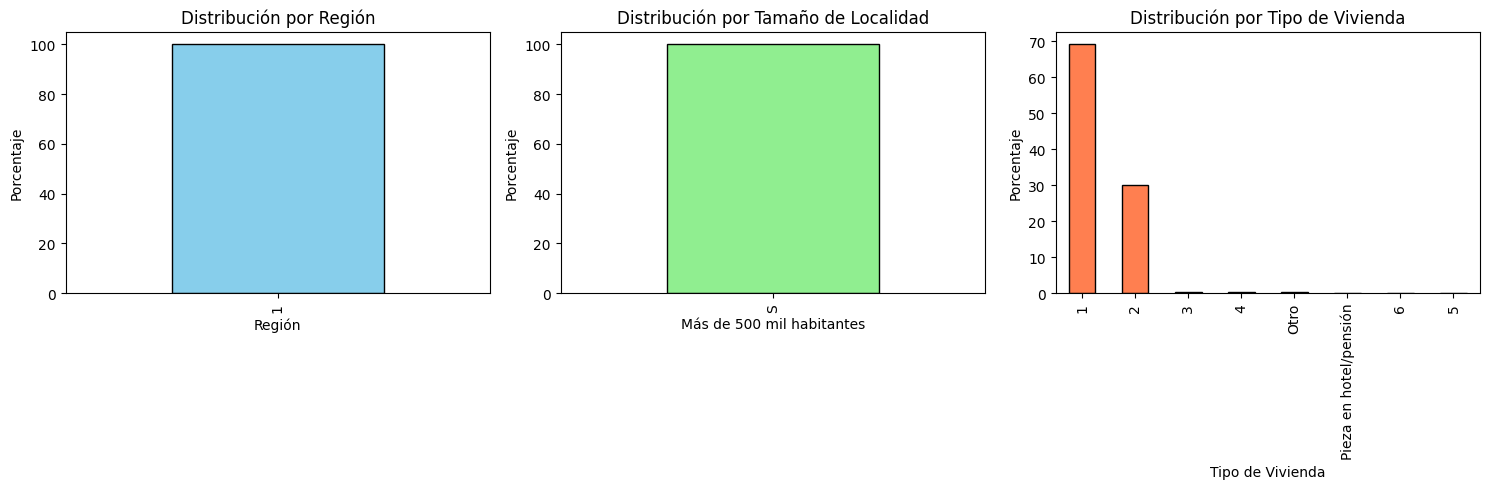

In [ ]:
# REGION_x
region_freq = df_merged['REGION_x'].value_counts(normalize=True) * 100

# MAS_500_x
mas_500_freq = df_merged['MAS_500_x'].value_counts(normalize=True) * 100

# IV1
iv1_freq = df_merged['IV1'].value_counts(normalize=True) * 100

# Veo la distribución de frecuencias
print("Distribución de Frecuencia de la Región (REGION_x):")
print(region_freq)
print("\nDistribución de Frecuencia del Tamaño de Localidad (MAS_500_x):")
print(mas_500_freq)
print("\nDistribución de Frecuencia del Tipo de Vivienda (iv1):")
print(iv1_freq)

# Miro las variables en "cuadros"
plt.figure(figsize=(15, 5))

# Plot 1: REGION_x
plt.subplot(1, 3, 1)
region_freq.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Porcentaje')

# Plot 2: MAS_500_x
plt.subplot(1, 3, 2)
mas_500_freq.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución por Tamaño de Localidad')
plt.xlabel('Más de 500 mil habitantes')
plt.ylabel('Porcentaje')

# Plot 3: IV1
plt.subplot(1, 3, 3)
iv1_freq.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribución por Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Porcentaje')

plt.tight_layout()
plt.show()


Parte II: Clasificación y regularización

Ejercicio 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Filtrar los datos para el año 2004
data_2004 = df_merged[df_merged['ANO4'] == 2004]

# Filtrar los datos para el año 2024
data_2024 = df_merged[df_merged['ANO4'] == 2024]

# Función para los datos de un año específico
def preparar_datos(data, variable_dependiente):

    y = data['ESTADO'].values  # Vector y
    X = data.drop(columns=['ESTADO']).values  # Matriz X sin la variable dependiente

    # Agregar una columna de unos 
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Añadir columna de unos como la primera columna de la matriz X

    # División de los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    return X_train, X_test, y_train, y_test

# Preparar datos para el año 2004
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = preparar_datos(data_2004, 'ESTADO')

# Preparar datos para el año 2024
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = preparar_datos(data_2024, 'ESTADO')

# Verificación de las dimensiones de cada conjunto
print("Año 2004 - X_train shape:", X_train_2004.shape, ", X_test shape:", X_test_2004.shape)
print("Año 2004 - y_train shape:", y_train_2004.shape, ", y_test shape:", y_test_2004.shape)

print("Año 2024 - X_train shape:", X_train_2024.shape, ", X_test shape:", X_test_2024.shape)
print("Año 2024 - y_train shape:", y_train_2024.shape, ", y_test shape:", y_test_2024.shape)


Año 2004 - X_train shape: (5306, 190) , X_test shape: (2274, 190)
Año 2004 - y_train shape: (5306,) , y_test shape: (2274,)
Año 2024 - X_train shape: (3966, 190) , X_test shape: (1700, 190)
Año 2024 - y_train shape: (3966,) , y_test shape: (1700,)
